<a href="https://colab.research.google.com/github/AK-Github-0/Classifiication-of-Moon-Dataset/blob/main/Classificiation_by_NN_%26_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.layers import Dense, Activation
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import sklearn as sk

In [20]:
feature_set_x, labels_y = datasets.make_moons(1000, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(feature_set_x, labels_y, test_size=0.33, random_state=42)

X_train and y_train is the pattern set to be used for training.

X_test and y_test is the pattern set to be used for evaluation after training.

In [21]:
X1 = []
Y1 = []
X2 = []
Y2 = []

for i, j in zip(feature_set_x, labels_y):
  if j == 0:
    X1.append(i[0])
    Y1.append(i[1])
  else:
    X2.append(i[0])
    Y2.append(i[1])

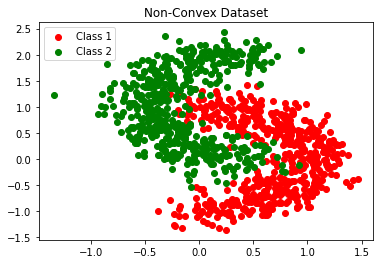

In [22]:
plt.scatter(Y1, X1, color="Red")
plt.scatter(Y2, X2, color="Green")
plt.legend(["Class 1", "Class 2"])
plt.title("Non-Convex Dataset")
plt.show()

In [8]:
model = tf.keras.Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
training = model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
670/670 [==============================] - 2s 2ms/step - loss: 0.3934 - accuracy: 0.8269
Epoch 2/50
670/670 [==============================] - 3s 4ms/step - loss: 0.2911 - accuracy: 0.8597
Epoch 3/50
670/670 [==============================] - 2s 2ms/step - loss: 0.2778 - accuracy: 0.8701
Epoch 4/50
670/670 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.8657
Epoch 5/50
670/670 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.8791
Epoch 6/50
670/670 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.8672
Epoch 7/50
670/670 [==============================] - 1s 2ms/step - loss: 0.2640 - accuracy: 0.8776
Epoch 8/50
670/670 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.8776
Epoch 9/50
670/670 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.8761
Epoch 10/50
670/670 [==============================] - 1s 2ms/step - loss: 0.2605 - accuracy: 0.8806

Plot the learning curve for the training phase of the model

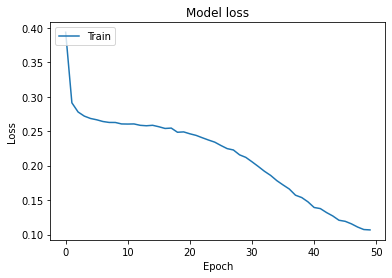

In [ ]:
plt.plot(training.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test accuracy percentage :', score[1]*100)

Test accuracy percentage : 96.36363387107849


In [ ]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)

11/11 [==============================] - 0s 3ms/step


In [ ]:
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[159   0]
 [171   0]]


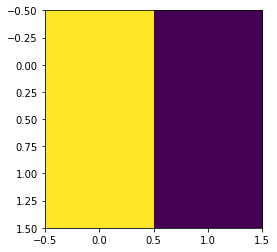

In [ ]:
matrix = confusion_matrix(y_test, predicted,normalize='true')
plt.imshow(matrix)

In [ ]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       159
           1       0.00      0.00      0.00       171

    accuracy                           0.48       330
   macro avg       0.24      0.50      0.33       330
weighted avg       0.23      0.48      0.31       330



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tp = matrix[0][0]
fn = matrix[0][1]
fp = matrix[1][0]
tn = matrix[1][1]

tp is true positive, fn is false negative, fp is false positive, tn is true negative.

In [ ]:
sensitivity= tp/(tp+fn)
print(sensitivity)

1.0


In [ ]:
specificity = tn/(tn+fp)
print(specificity)

0.0


In [ ]:
precision = tp/(tp+fp)
print(precision)

0.4818181818181818


Increasing number of hidden layers

In [ ]:
model2 = tf.keras.Sequential()
model2.add(Dense(50, input_dim=2, activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=1)

In [ ]:
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
score2 = model2.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test accuracy percentage :', score2[1]*100)

Upon increasing the number of hidden layers, the time taken for training increased as the model complexity increased.

Increasing number of neurons in hidden layers

In [ ]:
model3 = tf.keras.Sequential()
model3.add(Dense(50, input_dim=2, activation='relu'))
model3.add(Dense(45, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=1)

In [ ]:
plt.plot(history3.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
score3 = model3.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test accuracy percentage :', score3[1]*100)

Adding data normalization


In [ ]:
X_train = X_train.astype(np.float32)
X_train = X_train/3
X_test = X_test.astype(np.float32)
X_test = X_test/3

In [ ]:
model4 = tf.keras.Sequential()
model4.add(Dense(50, input_dim=2, activation='relu'))
model4.add(Dense(30, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=1)

In [ ]:
plt.plot(history4.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
score4 = model4.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test accuracy percentage :', score4[1]*100)

In [ ]:
from tensorflow.keras.optimizers import SGD

model = tf.keras.Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

learning_rate = 0.09
momentum = 0.1

# Create optimizer with specified learning rate and momentum
optimizer = SGD(lr=learning_rate, momentum=momentum)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

training = model.fit(X_train, y_train, epochs=30, batch_size=1)

"""Plot the learning curve for the training phase of the model"""

plt.plot(training.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy percentage :', score[1]*100)

In [23]:
from sklearn.svm import SVC
svc = SVC(C=2)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
svm_accuracy = sk.metrics.accuracy_score(y_test, y_predict)
print('Accuracy of SVC = {} '.format(svm_accuracy))

Accuracy of SVC = 0.9696969696969697 


In [24]:
# Accuracy Score
print('Accuracy of SVM Algorithm: '
      , sk.metrics.accuracy_score(y_test, y_predict)*100)

# confusion matrix
print('Confusion matrix: ')
cm_SVM = sk.metrics.confusion_matrix(y_test, y_predict)
print(cm_SVM)



Accuracy of SVM Algorithm:  96.96969696969697
Confusion matrix: 
[[148   2]
 [  8 172]]
